Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Item a)

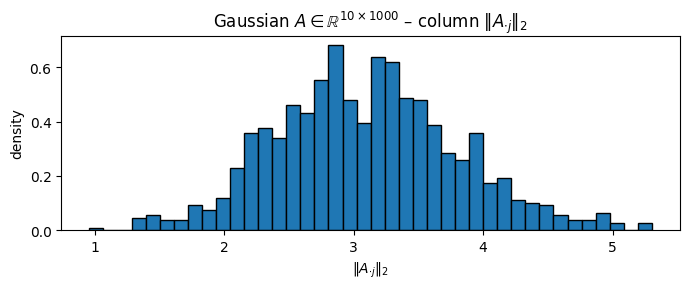

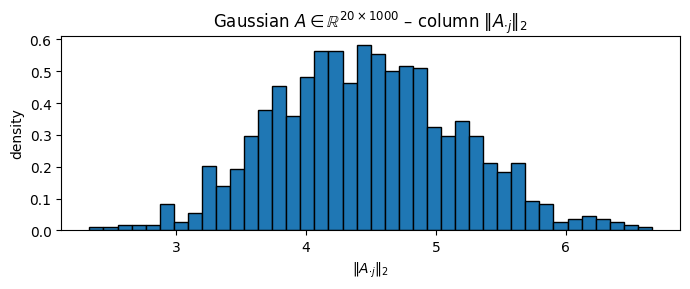

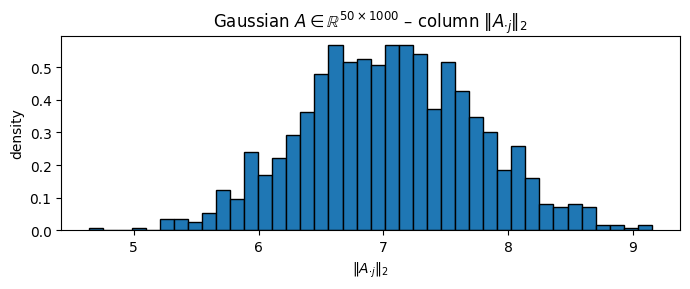

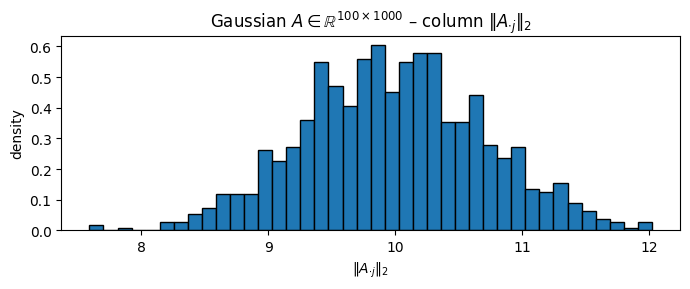

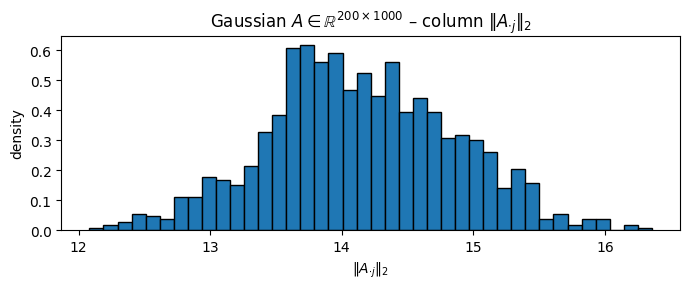

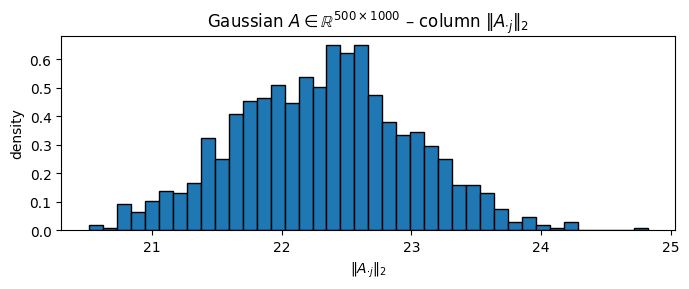

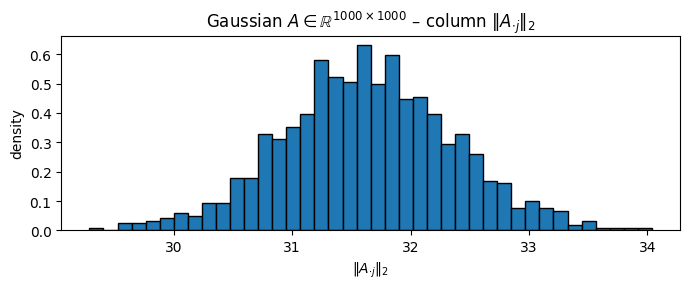

In [2]:
def _parse_int_list(prompt: str) -> list[int]:
    
    """
    Repeatedly prompt the user until they provide a non-empty list of integers.

    Args:
        prompt (str): The prompt message to display to the user.

    Returns:
        list[int]: A list of integers entered by the user.

    Raises:
        ValueError: If the user input cannot be parsed into a non-empty list of integers.
    """

    while True:
        raw = input(prompt).strip()
        try:
            values = [int(x) for x in raw.replace(";", ",").split(",") if x]
            if not values:
                raise ValueError
            return values
        except ValueError:
            print("⚠️  Please enter a comma-separated list of integers (e.g. 10,20,50).")

def _make_hists(
    m_vals: list[int],
    n_vals: list[int],
    bins: int = 40,
    density: bool = True,
    seed: int | None = None
) -> None:
    
    """
    Generate and display a histogram for each (m, n) pair, where each histogram shows the distribution
    of column 2-norms of a random Gaussian matrix of shape (m, n).

    Args:
        m_vals (list[int]): List of row counts (m values) for the matrices.
        n_vals (list[int]): List of column counts (n values) for the matrices.
        bins (int, optional): Number of bins for the histogram. Defaults to 40.
        density (bool, optional): If True, plot probability density instead of count. Defaults to True.
        seed (int | None, optional): Random seed for reproducibility. Defaults to None.

    Returns:
        None

    Raises:
        ValueError: If m_vals or n_vals are empty.
    """

    rng = np.random.default_rng(seed)
    for m in m_vals:
        for n in n_vals:
            norms = np.linalg.norm(rng.standard_normal((m, n)), axis=0) #draw the gaussian matrix and compute column 2-norms

            plt.figure(figsize=(7, 3)) #one figure per (m, n) to keep it readable
            plt.hist(norms, bins=bins, density=density, edgecolor="black")
            plt.title(rf"Gaussian $A\in\mathbb{{R}}^{{{m}\times {n}}}$ – column $\|A_{{\cdot j}}\|_2$")
            plt.xlabel(r"$\|A_{\cdot j}\|_2$")
            plt.ylabel("density" if density else "count")
            plt.tight_layout()
            plt.show()

def main() -> None:
    fix_n = input("Do you want to **fix n and vary m**? [y/n] ").strip().lower()

    if fix_n == "y":
        n = int(input("Fixed n (number of columns): ").strip())
        m_vals = _parse_int_list("List the m values (rows), comma-separated: ")
        _make_hists(m_vals, [n])

    else:
        n_vals = _parse_int_list("List the n values (columns), comma-separated: ")
        m_vals = _parse_int_list("List the m values (rows), comma-separated: ")
        _make_hists(m_vals, n_vals)

main()


item b)

Histograms of off-diagonal inner products for Gaussian matrices


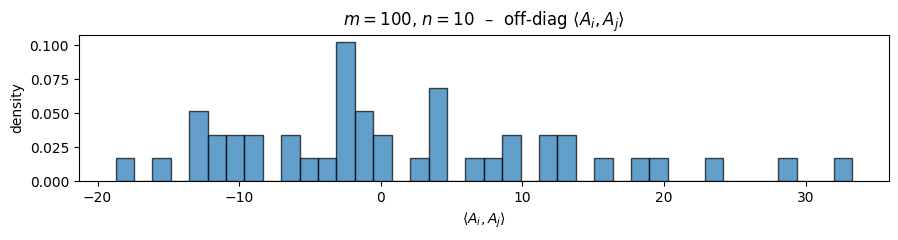

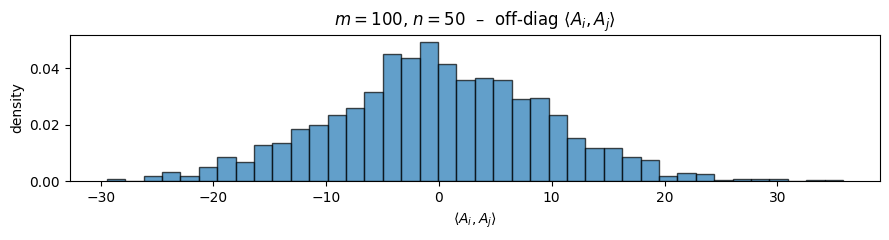

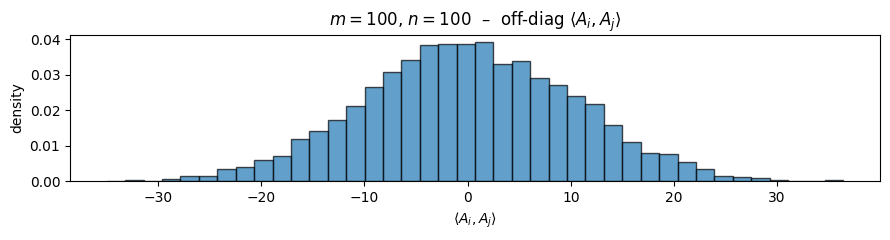

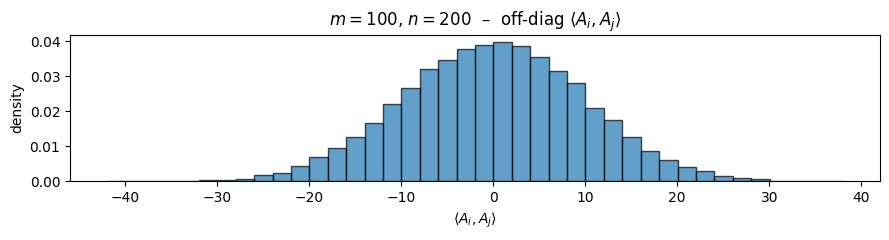

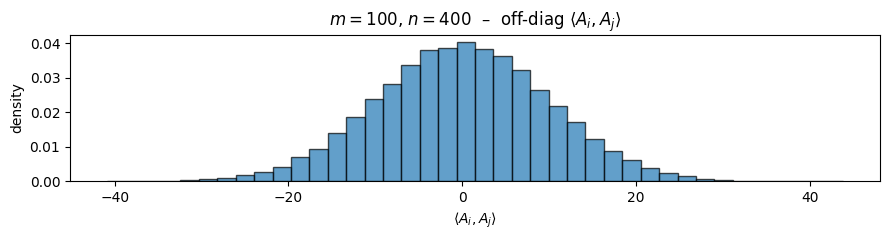

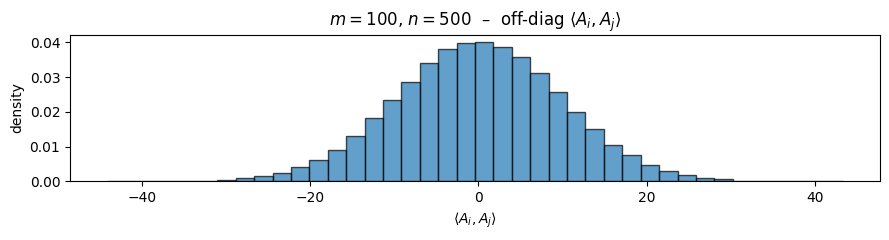

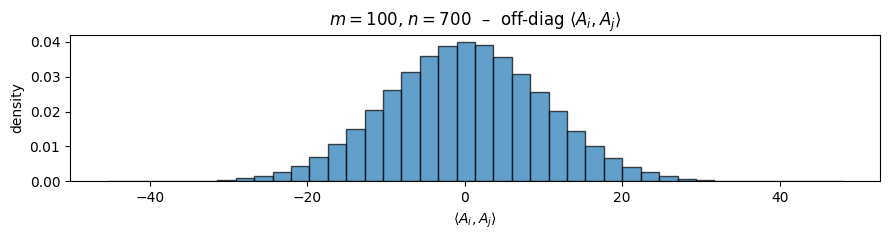

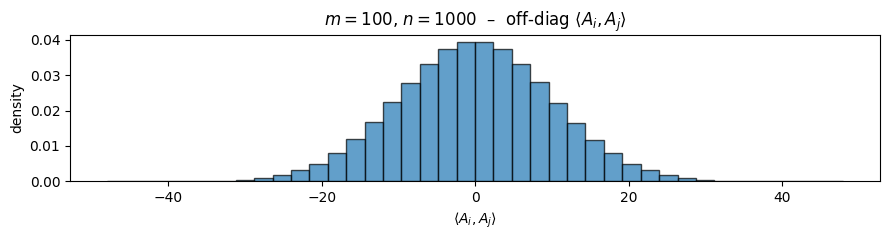

In [2]:
def _parse_int_list(prompt: str) -> list[int]:

    """
    Prompt the user repeatedly until a non-empty list of integers is provided.

    Args:
        prompt (str): The prompt message to display to the user.

    Returns:
        list[int]: A list of integers entered by the user.

    Raises:
        ValueError: If the input cannot be parsed into a non-empty list of integers.
    """

    while True:
        raw = input(prompt).strip()
        try:
            values = [int(x) for x in raw.replace(";", ",").split(",") if x]
            if not values:
                raise ValueError
            return values
        except ValueError:
            print("⚠️  Please enter a comma-separated list of integers (e.g. 10,20,50).")

def make_inner_product_hists(
    m_vals: list[int],
    n_vals: list[int],
    bins: int = 40,
    density: bool = True,
    seed: int | None = None
) -> None:
    
    """
    Generate and display histograms of off-diagonal inner products ⟨A_i, A_j⟩
    for Gaussian random matrices A ∈ R^{m×n}, for each (m, n) pair.

    Args:
        m_vals (list[int]): List of row dimensions (m values).
        n_vals (list[int]): List of column dimensions (n values).
        bins (int, optional): Number of histogram bins. Defaults to 40.
        density (bool, optional): If True, plot probability densities; if False, plot counts. Defaults to True.
        seed (int | None, optional): Random seed for reproducibility. Defaults to None.

    Returns:
        None

    Raises:
        ValueError: If m_vals or n_vals are empty or contain invalid values.
    """

    rng = np.random.default_rng(seed)
    for m in m_vals:
        for n in n_vals:
            A = rng.standard_normal((m, n))
            G = A.T @ A

            ips = G[np.triu_indices(n, k=1)]

            plt.figure(figsize=(9, 2.5))
            plt.hist(ips, bins=bins, density=density,
                     edgecolor="black", alpha=0.7)

            plt.title(fr"$m={m}$, $n={n}$  –  off-diag $\langle A_i, A_j\rangle$")
            plt.ylabel("density" if density else "count")
            plt.xlabel(r"$\langle A_i, A_j\rangle$")
            plt.tight_layout()
            plt.show()

def main() -> None:

    """
    Main interactive function to obtain user parameters and generate histograms.

    Prompts the user for matrix dimensions, histogram settings, and random seed,
    then generates and displays the corresponding histograms.

    Returns:
        None
    """

    print("Histograms of off-diagonal inner products for Gaussian matrices")

    fix_m = input("Fix m (ambient dimension)? [y/n] ").strip().lower()
    if fix_m == 'y':
        m = int(input("Fixed m: ").strip())
        m_vals = [m]
    else:
        m_vals = _parse_int_list("List m values (rows), comma-separated: ")

    fix_n = input("Fix n ? [y/n] ").strip().lower()
    if fix_n == 'y':
        n = int(input("Fixed n: ").strip())
        n_vals = [n]
    else:
        n_vals = _parse_int_list("List n values (columns), comma-separated: ")

    bins = input("Number of bins [default=40]: ").strip()
    bins = int(bins) if bins else 40

    density = input("Plot density? [y/n, default=y]: ").strip().lower()
    density = density != 'n' if density else True

    seed_str = input("Random seed (optional, press Enter to skip): ").strip()
    seed = int(seed_str) if seed_str else None

    make_inner_product_hists(
        m_vals=m_vals,
        n_vals=n_vals,
        bins=bins,
        density=density,
        seed=seed
    )

if __name__ == "__main__":
    main()

item c)

Running with m=100, n=300, K=100
Analyzing 100 Gaussian matrices of shape (100, 300)...
Max correlation values computed: 100


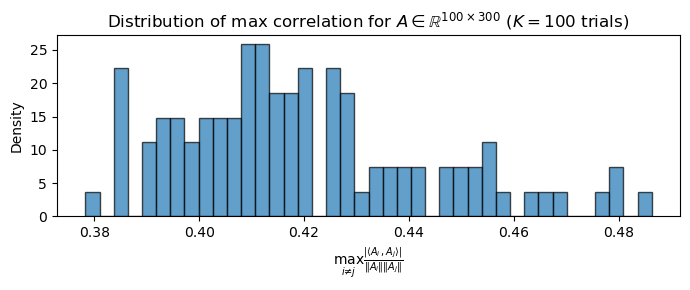

Running with m=100, n=300, K=500
Analyzing 500 Gaussian matrices of shape (100, 300)...
Max correlation values computed: 500


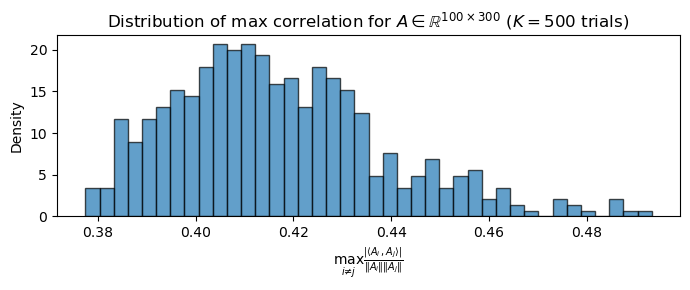

Running with m=100, n=300, K=1000
Analyzing 1000 Gaussian matrices of shape (100, 300)...
Max correlation values computed: 1000


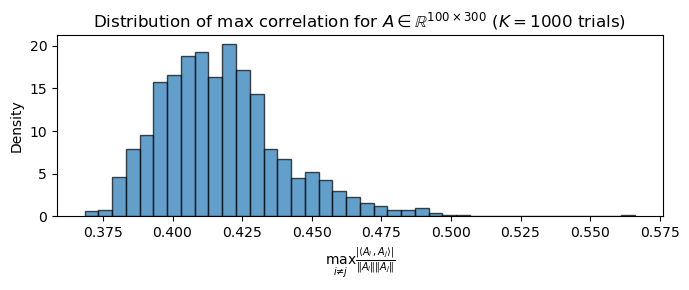

Running with m=100, n=300, K=10000
Analyzing 10000 Gaussian matrices of shape (100, 300)...
Max correlation values computed: 10000


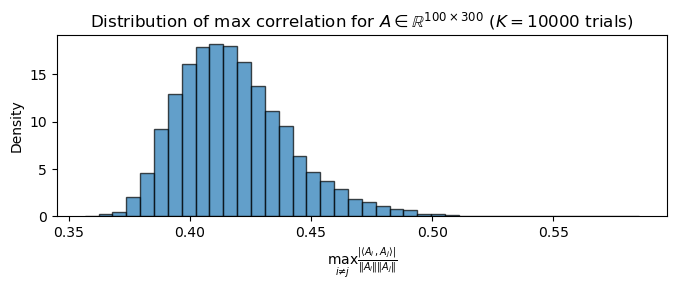

In [26]:
def plot_max_correlations(
    m: int,
    n: int,
    K: int = 1000,
    bins: int = 40,
    seed: int | None = None
) -> None:
    """Analyze and plot the distribution of maximum correlations
    between columns of a Gaussian random matrix A ∈ R^{m×n}.
    |<A_i, A_j>| / (||A_i|| ||A_j||)

    Args:
        m (int): Row dimension of the Gaussian matrix.
        n (int): Column dimension of the Gaussian matrix.
        K (int, optional): Number of trials (Matricies to generate). Defaults to 1000.
        bins (int, optional): Bins for histogram. Defaults to 40.
        seed (int | None, optional): Random seed for reproducibility. Defaults to None.
    """
    rng = np.random.default_rng(seed)
    max_correlations = []
    
    print(f"Analyzing {K} Gaussian matrices of shape ({m}, {n})...")
    
    for i in range(K):
        print(f"Processing matrix {i + 1}/{K}...", end="\r")
        
        # Generate a random Gaussian matrix
        A = rng.standard_normal((m, n))
        
        # Column 2-norms and avoid division by zero
        norms = np.linalg.norm(A, axis=0)
        if np.any(norms == 0):
            print("⚠️  Found a column with zero norm, skipping this matrix.")
            continue
        
        # Compute the Gram matrix
        G = A.T @ A # G[i, j] = <A_i, A_j>
        
        norm_products = np.outer(norms, norms) # Outer product of norms
        correlation_matrix = G / norm_products # Element-wise division for correlation
        
        # diagonal to zero to ignore self-correlations (i == j)
        # and find the maximum absolute correlation
        np.fill_diagonal(correlation_matrix, 0)
        max_corr = np.max(np.abs(correlation_matrix))
        
        max_correlations.append(max_corr)
    
    print(f"Max correlation values computed: {len(max_correlations)}")
    
    # 6. Plot the histogram of the collected maximum values
    plt.figure(figsize=(7, 3))
    plt.hist(max_correlations, bins=bins, density=True, edgecolor="black", alpha=0.7)
    plt.title(f"Distribution of max correlation for $A \\in \\mathbb{{R}}^{{{m}\\times{n}}}$ ($K={K}$ trials)")
    plt.xlabel(r"$\max_{i \neq j} \frac{|\langle A_i, A_j \rangle|}{\|A_i\| \|A_j\|}$")
    plt.ylabel("Density")
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"../docs/images/max_corr_{K}.png", dpi=200)
    plt.show()


def main():
    """
    Main function to run the experiment described in the problem.
    """
    # parameters for the Gaussian matrix
    # m=rows, n=columns, K=trials
    m = 100
    n = 300
    Ks = [100, 500, 1000, 10000]
    
    seed = 42

    for K in Ks:
        print(f"Running with m={m}, n={n}, K={K}")
        plot_max_correlations(m=m, n=n, K=K, seed=seed)


if __name__ == "__main__":
    main()